<a href="https://colab.research.google.com/github/mjalalimanesh/sparse-dot-deep-learning/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### Add Google Drive and change path  

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/DL_imaging/ANN_Colab_2"
import os
os.chdir("/content/drive/My Drive/DL_imaging/ANN_Colab_2")

data2.jpg	network_architectures.py    read_data_3.py
data3.jpg	network_outputs_double.mat  read_experiment_data.py
data.jpg	network_outputs.mat	    read_preprocess_data.py
gdata		new_generalization	    ResNet_2.py
homo.txt	new_pydata		    signal.png
modelbeta3.h5	oldies			    special_simulation_measurements
my_ANN_2.ipynb	__pycache__


### Import required Libraries

In [ ]:
import tensorflow as tf
print('TF Version : ', tf.__version__)
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd	
from sklearn import preprocessing

TF Version :  2.3.0


### Read Model

In [ ]:
model = tf.keras.models.load_model('modelbeta.h5', compile=False)

### Read Training, Validation and Test Data

In [ ]:
from read_preprocess_data import read_preprocess_data

x_train, y_train, x_val, y_val, x_test2, y_test, stand = read_preprocess_data(subtract_homogen=True,  \
                                                                             is_standard_scalar_input=True
                                                                             , noise_level=0.0)

In [ ]:
print('input training data shape : ', x_train.shape)
print('output training data shape', y_train.shape)
print('-'*40)
print('input val data shape : ', x_val.shape)
print('output val data shape : ', y_val.shape)
print('-'*40)
print('input test data shape : ', x_test.shape)
print('output test data shape : ', y_test.shape)


input training data shape :  (28900, 29)
output training data shape (28900, 4096)
----------------------------------------
input val data shape :  (1000, 29)
output val data shape :  (1000, 4096)
----------------------------------------


NameError: ignored

Plot several samples

In [ ]:
grd = (64,64)
point = np.arange(0,36).reshape((1,36))
for i in range(63,64):
    plt.figure(figsize=(10,4))
    x = x_test[i:i+1,:]
    plt.plot(x.ravel(), '-o', linewidth=5.5, markersize=12)
    #plt.axis('off')
    y_test_ = np.zeros((64*64))
    y_test_ = y_test[i:i+1,:].ravel() 
    y = y_test_.reshape(grd, order='F')
    plt.figure()
    plt.imshow(y)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #axis.off()
    plt.colorbar()
    plt.title(str(i) )

    

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
x = x_test[63:64,:]

ax.plot(x.ravel(), '-ko', linewidth=3.5, markersize=9)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('signal.png', dpi=800)

Read Simulation homogenous data and do same preprocessing as other data

In [ ]:
from read_preprocess_data import one_fit

Homo_input = (pd.read_csv("homo.txt", sep=',', header = None).values)
Homo_input = (Homo_input.T[:,:] / np.max(Homo_input[:,:]))
Homo_input = Homo_input * 0.9111 
homo = np.log(one_fit(Homo_input))


### Read, preprocess and plot experimental data

#### Read Expeimental Data

In [ ]:
from read_experiment_data import read_experiment_data
homo_experiment_3, experiment0 = read_experiment_data(experiment_number=3)


#### Preprocess and plot
In this part we do some processing on experimental data to make them ready for "inference phase". First data is corrected for background light by subtracting dark_correction from it. Then we do some Operations which we have implemented on trainig data in "trainig phase" including  nomalizing data, taking logarithm of data, subtracting homogenoues values and Standardization data. An Example of Experimental Data is shown in below figure


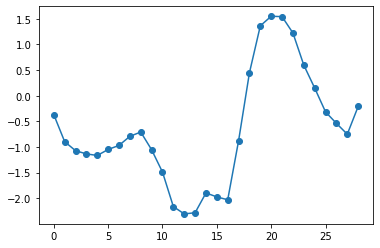

In [ ]:
dark_correction0 = np.array([[1.575, 3.85, 1, 0.85, 0.3, 0.4, 0.475, 0.3, 1.775, 0.775, 2.35, 1.225, 0.95, 0.7 , 0.4,  \
                             0.7, 0.95, 1.225, 2.35, 0.775, 1.775, 0.3, 0.475, 0.4, 0.3, 0.85, 1, 3.85, 1.575]])

dark_correction = np.array([[1.575, 3.85, 1, 0.85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0,  \
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.85, 1, 3.85, 1.575]])

experiment0_dark_corrected = experiment0
experimetn0_normalized = experiment0_dark_corrected / experiment0_dark_corrected.max(axis=1, keepdims=True)

experiment_log = np.log(experimetn0_normalized)

#diff = homo - homo_experiment_3
experiment_homo = homo - (experiment_log)
#experiment_homo =  (experiment_log)

experiment = np.zeros((7,29), dtype=np.float)
for i in range(7):
  experiment[i, :] = stand.transform(experiment_homo[i:i+1, :].astype(float))
    
#plt.figure()
#plt.plot(homo.ravel(),'-o', label='Homogenoues Simulation')
#plt.plot((homo_experiment_3).ravel(),'-o', label='Homogenoues Experiment')
#plt.legend()
plt.figure()
plt.plot(experiment[2,:].ravel(),'-o', label='An Example of Experimental Data')
#import sklearn 
#sklearn.metrics.r2_score(homo.ravel() , homo_experiment_3.ravel(), sample_weight=None, multioutput='uniform_average')


###Evaluate Model

In [ ]:
net_history = hist.history

# Evaluation, add metric on compile
scores = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
scores

['loss', 'mean_absolute_error']


[0.13064159452915192, 0.1316991001367569]

In [ ]:
net_history = hist.history

# Evaluation, add metric on compile
scores = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
scores

['loss', 'mean_absolute_error']


[0.08329787850379944, 0.08117549866437912]

In [ ]:
net_history = hist.history

# Evaluation, add metric on compile
scores = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
scores

['loss', 'mean_absolute_error']


[0.08231167495250702, 0.07326914370059967]

##### Plot Training and Validation loss versus epoch

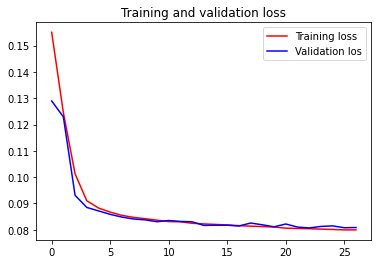

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
loss = net_history['loss']
val_loss = net_history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation los')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

### Visual Tests

*   Testing model performance on several simulation and experimantal samples and testing post-processing methods
*   Compare Current model with another (saved) model output results




#### Visual test for simulation data and post-processing

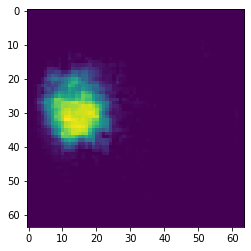

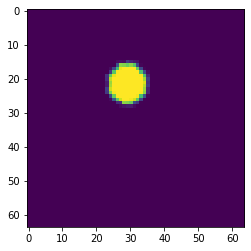

In [ ]:
from matplotlib import pyplot as plt
num = 5
y_pred = model.predict( experiment[0:1,:], batch_size=1, verbose=0, steps=None, callbacks=None)
grd = (64,64)
y_pred_ = y_pred.reshape(grd)
plt.imshow(y_pred_)
plt.figure()
plt.imshow(y_test[num:num+1, :].reshape(grd))


Filtering output with threshold and median and combination of these two **filters**


In [ ]:
from scipy.signal import medfilt2d
# just median
y_pred_med = medfilt2d(y_pred_, 3)
# just threshold
y_pred_threshold = y_pred_.copy()
y_pred_threshold[y_pred_threshold > 0.0050 ] = 0.1
# threshold 2
y_predthreshold_2 = y_pred.copy()
y_predthreshold_2[ y_predthreshold_2 < 0.005 ] = 0.01
y_pred_threshold_2 = np.zeros((64*64,))
y_pred_threshold_2= y_predthreshold_2
grd = (64,64)
y_pred_threshold_2 = y_pred_threshold_2.reshape(grd, order='F')
# threshold + median
y_pred_threshold_2_med = medfilt2d(y_pred_threshold_2, 7)
# median + threshold
y_pred_med_threshold = y_pred_med.copy()
y_pred_med_threshold[np.logical_and(y_pred_threshold < 1.3*0.01 ,  y_pred_threshold > 0)] = 0.01



In [ ]:
import matplotlib.colors as colors

plt.imshow(y_test[num:num+1, :].reshape(grd), norm=colors.PowerNorm(gamma=0.5))
plt.title('original')
plt.colorbar()
plt.show()
#y_pred_[y_pred_!=0]= y_pred_[y_pred_!=0]+100
plt.imshow((y_pred_), norm=colors.PowerNorm(gamma=0.5))
plt.title('Prediction')
plt.colorbar()
plt.show()

plt.imshow(y_pred_med)
plt.title('Prediction Median Filtered 7*7')
plt.show()

plt.imshow(y_pred_threshold)
plt.title('Prediction with threshold')
plt.show()

plt.imshow(y_pred_threshold_2_med)
plt.title('Prediction with threshold 2 + median')
plt.show()

plt.imshow(y_pred_med_threshold)
plt.title('Prediction with median + threshold')
plt.show()


#### Compare Current model with another (saved) model output results
Currently set for comparing MLP and FC+CNN models

In [ ]:
y_pred = model.predict( experiment, batch_size=1, verbose=0, steps=None, callbacks=None)
grd = (64,64)
i = 0
j = 0
plt.figure(figsize=(36,36))
while i < 7:
  plt.subplot(7,2,j+1)
  plt.imshow((y_pred[i:i+1,:].reshape(grd)))
  plt.title('Prediction')
  savenpy_path = 'cnn_pydata/3_' + str(i+1) + '_exp.npy'
  np.save(savenpy_path, y_pred[i,:].reshape(grd))
  plt.colorbar()
  iid = '3_' + str(i+1) + '_exp.npy'
  pydata_path = 'pydata/' + iid
  y_pred_FC = np.load(pydata_path )
  plt.subplot(7,2,j+2)
  plt.imshow(y_pred_FC)
  plt.title('Prediction')
  plt.colorbar()
  i = i + 1
  j = j + 2

plt.tight_layout(h_pad= 0.001)
plt.show()
plt.savefig('FC_vs_CNN')

#### Show Experimental Results

 0'th experimet error : 0.423571712831875  
 1'th experimet error : 1.7122720881488256  
 2'th experimet error : 0.0719638122096781  
 3'th experimet error : 0.08066862441458521  
 4'th experimet error : 0.5382119825640208  
 5'th experimet error : 0.008928912602630274  
 6'th experimet error : 0.045313874258494265  
********
mean error 0.4115615724328728


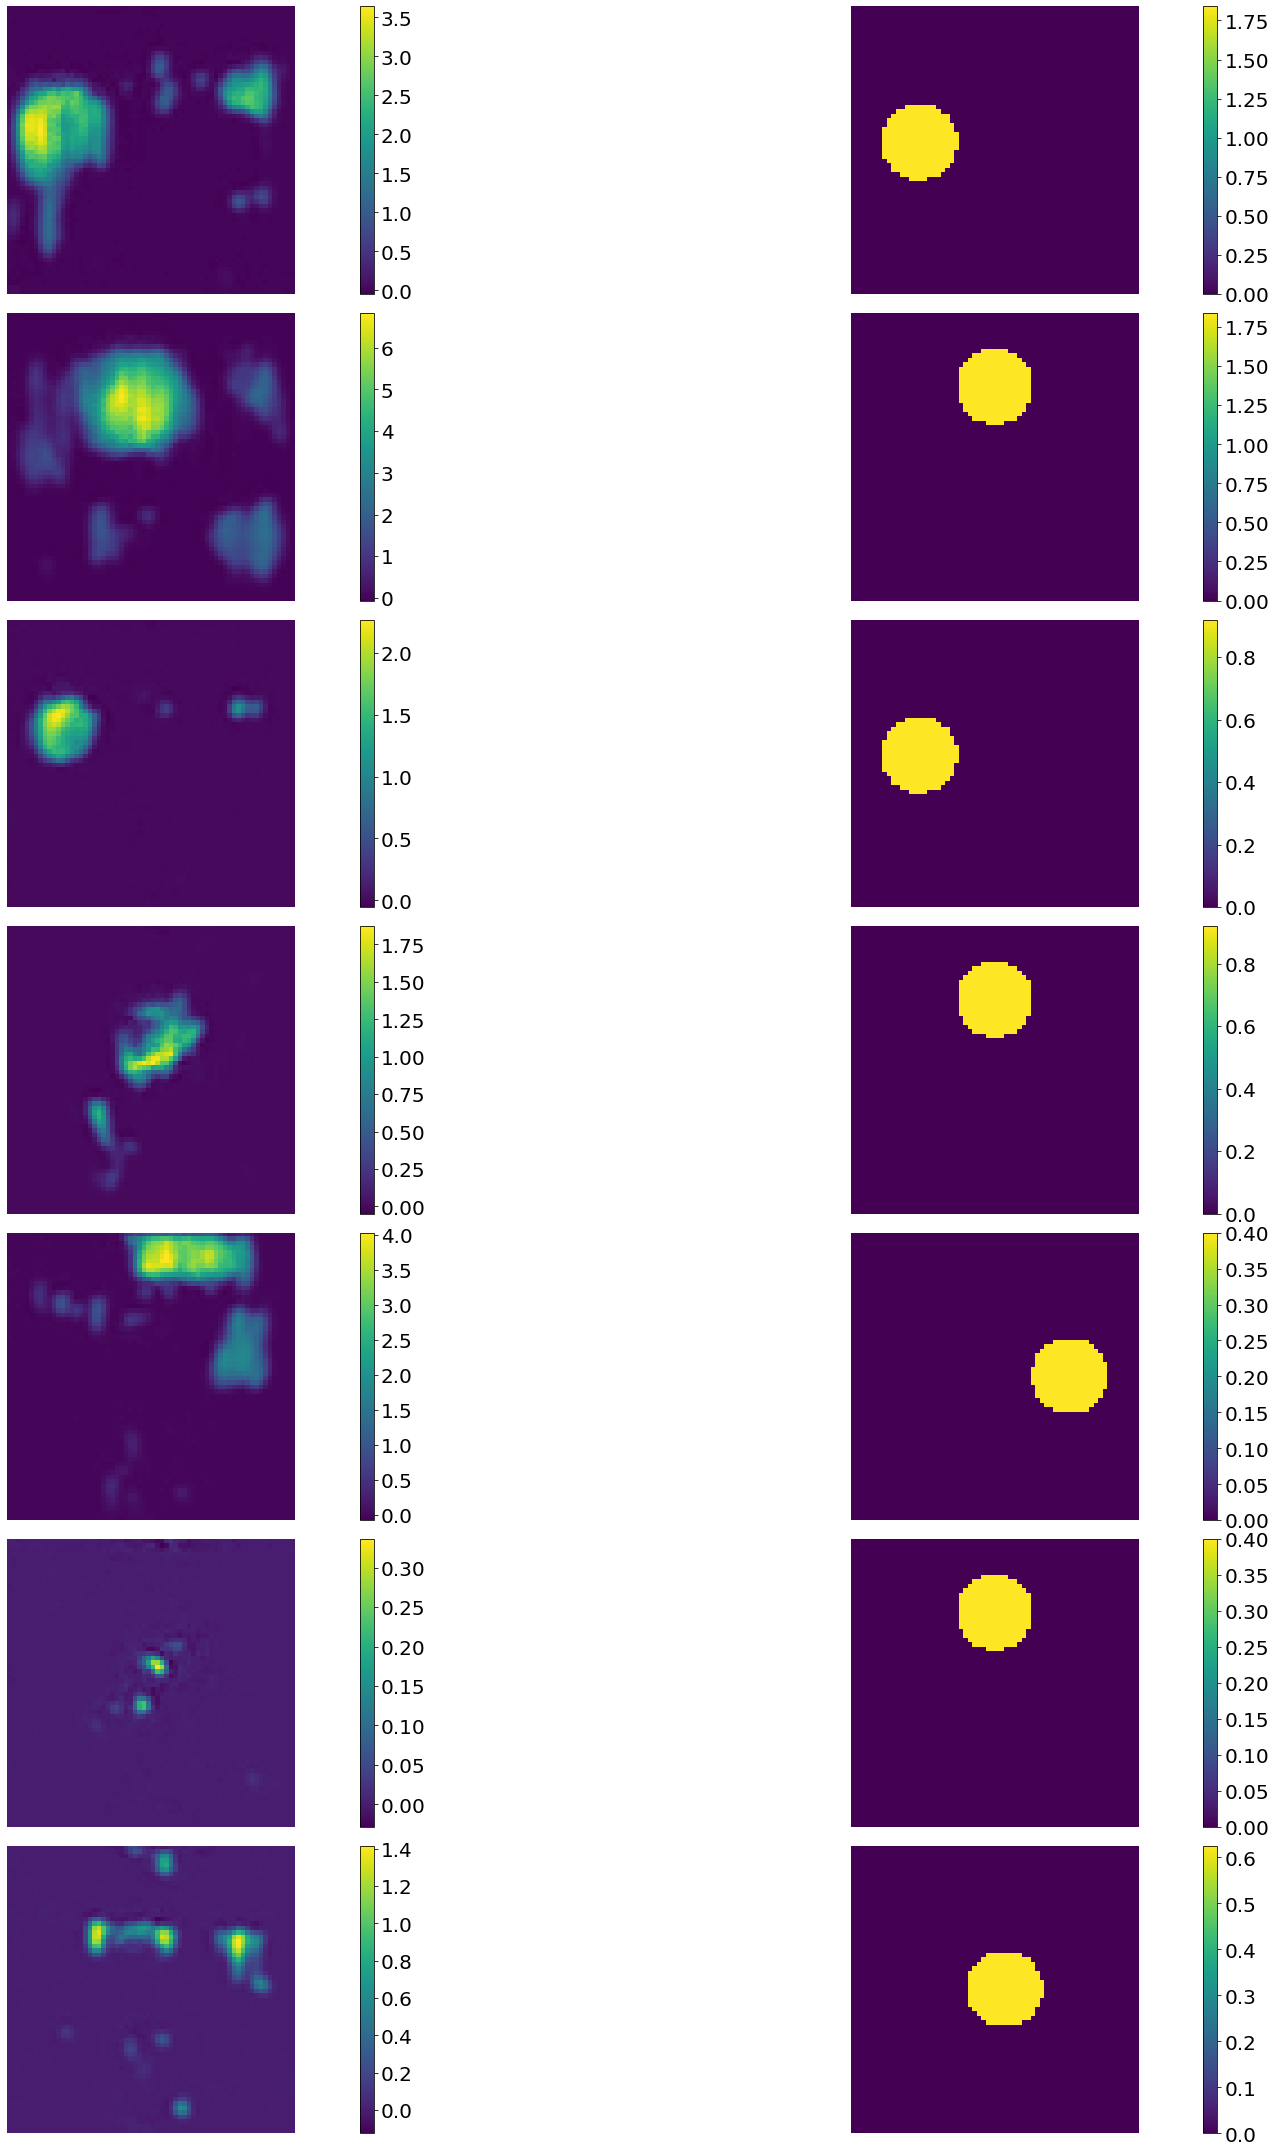

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.io
import skimage.metrics

#model = tf.keras.models.load_model('modelbeta3.h5', compile=False)


fig, axs = plt.subplots(7,2, figsize=(30, 30))


for i in range(7):
  y_pred = model.predict( experiment[i:i+1,:], batch_size=1, verbose=0, steps=None, callbacks=None)
  grd = (64,64)
  y_pred_ = y_pred.reshape(grd)
  #np.save('new_pydata/exp{}.npy'.format(i+1), y_pred_)
  im1 = axs[i, 0].imshow(y_pred_)
  axs[i, 0].axis("off")
  p1 = plt.colorbar(im1, ax=axs[i, 0])
  for l in p1.ax.yaxis.get_ticklabels():
    l.set_size(20)

  path = "gdata/3_" + str(i+1) + ".mat"
  f = scipy.io.loadmat(path)
  real_out = f['bmua'].reshape(grd).T
  if i == 6:
    real_out = real_out / 4
  im2 = axs[i, 1].imshow(real_out)
  axs[i, 1].axis("off")
  p2 = plt.colorbar(im2, ax=axs[i,1])
  for l in p2.ax.yaxis.get_ticklabels():
    l.set_size(20)


plt.tight_layout(h_pad=0.0001)

error = []
for i in range(7):
  y_pred = model.predict( experiment[i:i+1,:], batch_size=1, verbose=0, steps=None, callbacks=None)
  grd = (64,64)
  y_pred_ = y_pred.reshape(grd)
  path = "gdata/3_" + str(i+1) + ".mat"
  f = scipy.io.loadmat(path)
  real_out = f['bmua'].reshape(grd).T
  if i == 6:
    real_out = real_out / 4
  error.append(skimage.metrics.mean_squared_error(real_out, y_pred_))
  print(" {}'th experimet error : {}  ".format(i, error[i]))
print("********")
print('mean error', np.mean(error))
plt.savefig('data3.jpg')

mlp mean error 0.027234594187317437

1-4090 layer dense + 2dconv mean error 0.024251534830712313

mean error 0.021098373967137218

###Save model

In [ ]:
model.save('modelbeta3.h5')

### Exploring outputs

plot cross-section of defect in x and y direction

In [ ]:
argmaxx = np.argmax(y_pred_)
ind = np.unravel_index(argmaxx, y_pred_.shape)

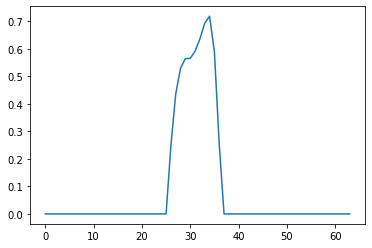

In [ ]:
plt.plot(y_pred_[ind[0],:])

In [ ]:
y_pred_[ind[0],:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.24799584, 0.43645203, 0.5300561 , 0.5648202 ,
       0.565413  , 0.5911364 , 0.63615507, 0.6931891 , 0.7186719 ,
       0.5903997 , 0.25438893, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

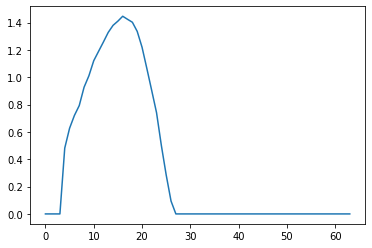

In [ ]:
plt.plot(y_pred_[:,ind[1]])

### Checking and saving Special Cases

including 3 inclusion phantom

In [ ]:
import h5py
f = h5py.File('network_outputs.mat','r')
data1 = f['Y_save'].value
net_input = np.array(data1).T # For converting to a NumPy array
net_input.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(30000, 29)

In [ ]:
import pandas as pd

exp3_1 = pd.read_csv("special_simulation_measurements/3_1.txt", sep=',', header = None).values
exp3_2 = pd.read_csv("special_simulation_measurements/3_2.txt", sep=',', header = None).values
exp3_3 = pd.read_csv("special_simulation_measurements/3_3.txt", sep=',', header = None).values
exp3_4 = pd.read_csv("special_simulation_measurements/3_4.txt", sep=',', header = None).values
exp3_7 = pd.read_csv("special_simulation_measurements/3_7.txt", sep=',', header = None).values
exp3_1.shape

(29, 1)

(1, 4096)


(1, 29)

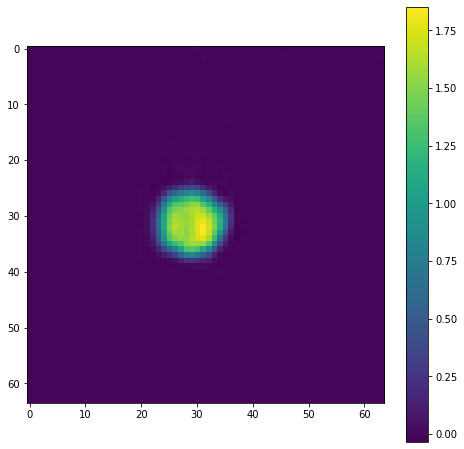

In [ ]:
import pandas as pd
from read_preprocess_data import one_fit, add_noise, multiply_noise

#Y0 = exp3_4.T
#Y0 = add_noise(Y0, chunksize= None)
#Y0 = multiply_noise(Y0, chunksize=None)

#Y0 = pd.read_csv("special_simulation_measurements/33_inc.txt", sep=',', header = None).values.T
Y0 = exp3_7.T
#Y0 = add_noise(Y0, chunksize= None)
#Y0 = multiply_noise(Y0, chunksize=None)

#Y0 = Y0[::-1]
#Y0 = x_test[43:44,:]
#Y0 = experiment[2:3, :]
Y1 = Y0 / Y0.max()
scale = 0.9111
Y1 = Y1 * scale
Y1 = one_fit(Y1)
Y1 = np.log(Y1)
Y2 = homo - Y1
Y = stand.transform(Y2)
y_pred = model.predict( Y , batch_size=1, verbose=0, steps=None, callbacks=None)
print(y_pred.shape)
y_pred_ = y_pred.reshape((64,64))
np.save('new_pydata/sim7', y_pred_)
plt.figure(figsize=(8,8))
plt.imshow(y_pred_)
plt.colorbar()
Y1.shape

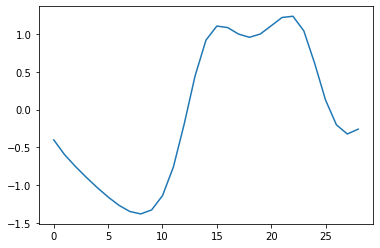

In [ ]:
plt.plot(Y.ravel(), label='2_inc')


## Run model several times to get avarage accuracy

In [ ]:
from network_architectures import mlp, conv2d_FC, conv1d_FC, FC_conv2d, resnet, one_d_conv, dense_1dconv
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.io
import skimage.metrics

fc_conv2d_error = []
fc_conv1d_conv2d_error = []

for m in range(2):
  for j in range(6):

    if m==0:
      model = FC_conv2d()
    elif m==1:
      model = dense_1dconv()



    my_optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer= my_optimizer , loss='mean_squared_error', metrics=['mean_absolute_error'])



    if m==0:
      lr_sc = [11, 18, 23, 30]
    elif m==1:
      lr_sc = [20, 27, 35, 45]

    # create a learning rate scheduler callback
    # 20-27-35-40
    def scheduler(epoch):
        if epoch <lr_sc[0]:
            return 0.001
        elif epoch < lr_sc[1]:
            return 0.0007
        elif epoch < lr_sc[2]:
            return 0.0003
        elif epoch < lr_sc[3]:
            return 0.0001
        else:
            return 0.00005
    LRS = tf.keras.callbacks.LearningRateScheduler(schedule= scheduler, verbose=0)
    # EarlyStopping call back to stop training when overfitting
    ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-9, \
                                          patience=10, verbose=0, mode='min', restore_best_weights=True)

    # fit the model
    hist = model.fit( x_train, y_train, batch_size =128, validation_data = ( x_val, y_val) , \
                    epochs =50, verbose=0, callbacks=[LRS, ES], initial_epoch=0)
    # save fitted model

    error = []
    for i in range(7):
      y_pred = model.predict( experiment[i:i+1,:], batch_size=1, verbose=0, steps=None, callbacks=None)
      grd = (64,64)
      y_pred_ = y_pred.reshape(grd)
      path = "gdata/3_" + str(i+1) + ".mat"
      f = scipy.io.loadmat(path)
      real_out = f['bmua'].reshape(grd).T
      if i == 6:
        real_out = real_out / 4
      error.append(skimage.metrics.mean_squared_error(real_out, y_pred_))
    
    if m==0:
      fc_conv2d_error.append(np.mean(error))
    elif m==1:
      fc_conv1d_conv2d_error.append(np.mean(error))

    print(m, j, "finished")
    

print('model 1 : ', fc_conv2d_error)
print('mean model 1 : ', np.mean(fc_conv2d_error))

print('model 2 : ', fc_conv1d_conv2d_error)
print('mean model 2 : ', np.mean(fc_conv1d_conv2d_error))
